In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/utilisateur/Desktop/Andrea/Brief auto/brief_auto_clean.csv', sep = ';')

In [8]:
df.head(20)

,Marque,Model,Année,Kilométrage,Code Postal,Prix
0,BMW,(G01) XDRIVE30DA 265 M SPORT,2020,27930,66,61620
1,VOLKSWAGEN,1.0 TSI 110 CARAT DSG,2020,20570,25,30120
2,BMW,(F11) (2) TOURING 530D XDRIVE 258 EXECUTIVE BVA8,2017,116492,78,32540
3,NISSAN,II 1.5 DCI 110 N-CONNECTA,2015,104610,31,16550
4,VOLKSWAGEN,VIII 2.0 TSI 320 R DSG7,2020,59,92,81300
5,PORSCHE,III COUPE E-HYBRID,2018,2199,69,190630
6,RENAULT,IV 1.7 DCI BLUE 120 BUSINESS EDC,2021,58880,28,22890
7,PEUGEOT,II 1.2 PURETECH 100 S&S ACTIVE,2021,20744,61,21940
8,KIA,IV (2) 1.6 CRDI 115 ISG ACTIVE 2WD,2018,103541,69,19070
9,PEUGEOT,II 1.2 PURETECH 130 S&S GT LINE E6,2020,35340,69,34690


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Marque       368 non-null    object
 1   Model        368 non-null    object
 2   Année        368 non-null    int64 
 3   Kilométrage  368 non-null    int64 
 4   Code Postal  368 non-null    int64 
 5   Prix         368 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 17.4+ KB


In [17]:
df.isna().sum() 
df.isna().any()

Marque         False
Model          False
Année          False
Kilométrage    False
Code Postal    False
Prix           False
dtype: bool

In [5]:
df['Marque'] = df['Marque'].apply(lambda x : x.split(' ')[0])
df['Marque']

0             BMW
1      VOLKSWAGEN
2             BMW
3          NISSAN
4      VOLKSWAGEN
          ...    
363       PEUGEOT
364       RENAULT
365         SKODA
366          AUDI
367    VOLKSWAGEN
Name: Marque, Length: 368, dtype: object

In [6]:
df['Marque'].value_counts()

PEUGEOT         54
AUDI            47
RENAULT         44
MERCEDES        32
CITROEN         28
VOLKSWAGEN      25
PORSCHE         19
BMW             13
OPEL            11
LAND            10
MINI            10
TOYOTA           7
FORD             7
FIAT             6
KIA              6
MAZDA            5
NISSAN           5
JAGUAR           4
SKODA            4
DS               4
JEEP             4
FERRARI          3
MASERATI         3
DODGE            3
DACIA            3
CHEVROLET        2
SEAT             2
CADILLAC         1
VOLVO            1
HONDA            1
ASTON            1
SUBARU           1
CUPRA            1
MERCEDES-AMG     1
Name: Marque, dtype: int64

In [13]:
dummy_marque = pd.get_dummies(df['Marque'])
dummy_marque

,ASTON,AUDI,BMW,CADILLAC,CHEVROLET,CITROEN,CUPRA,DACIA,DODGE,DS,...,OPEL,PEUGEOT,PORSCHE,RENAULT,SEAT,SKODA,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
366,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['Code Postal'].value_counts()

24    45
69    35
78    26
66    22
95    19
33    18
35    15
47    12
57    11
67    10
28    10
92     9
31     8
37     8
63     8
55     8
27     8
25     8
74     8
30     7
11     6
91     6
77     6
80     5
45     4
71     4
42     4
26     4
61     4
72     3
38     3
1      3
60     3
59     3
51     2
75     2
84     2
10     2
76     2
36     1
68     1
6      1
18     1
16     1
Name: Code Postal, dtype: int64

In [15]:
dummy_CodePostal = pd.get_dummies(df['Code Postal'])
dummy_CodePostal

,1,6,10,11,16,18,24,25,26,27,...,74,75,76,77,78,80,84,91,92,95
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df.describe()

,Année,Kilométrage,Code Postal,Prix
count,368.000000,368.000000,368.000000,368.000000
mean,2017.201087,69490.557065,52.864130,37550.434783
std,4.739284,48423.943262,24.213245,43953.172584
min,1956.000000,1.000000,1.000000,7870.000000
25%,2016.000000,30193.000000,30.000000,17475.000000
50%,2018.000000,63175.500000,57.000000,25495.000000
75%,2020.000000,100534.000000,69.500000,37615.000000
max,2023.000000,201049.000000,95.000000,462830.000000


In [9]:
df['Model'].value_counts()

II 1.2 PURETECH 100 S&S GT                                            3
IV 1.5 DCI 115 BLUE INTENS EDC                                        3
2.0 D240 14CV 4WD SE R-DYNAMIC AUTO                                   2
II 2.0 BLUEHDI 180 S&S GT EAT6                                        2
II (3) 1.6 BLUEHDI 100 S&S BUSINESS M                                 2
                                                                     ..
III COOPER S 192 BVA7 5P                                              1
II (2) 33 L2H2 BLUEHDI 130 BUSINESS BV6                               1
1.5 109 CDI 90 LONG                                                   1
III 180 D AMG LINE EDITION 7G-DCT                                     1
VII (2) 1.6 TDI 115 BLUEMOTION TECHNOLOGY CONFORT BUSINESS DSG7 5P    1
Name: Model, Length: 353, dtype: int64

In [18]:
df.drop(['Model'], axis = 1)

,Marque,Année,Kilométrage,Code Postal,Prix
0,BMW,2020,27930,66,61620
1,VOLKSWAGEN,2020,20570,25,30120
2,BMW,2017,116492,78,32540
3,NISSAN,2015,104610,31,16550
4,VOLKSWAGEN,2020,59,92,81300
...,...,...,...,...,...
363,PEUGEOT,2011,124177,11,10420
364,RENAULT,2018,47580,31,20110
365,SKODA,2020,17918,30,33970
366,AUDI,2015,81339,78,27810


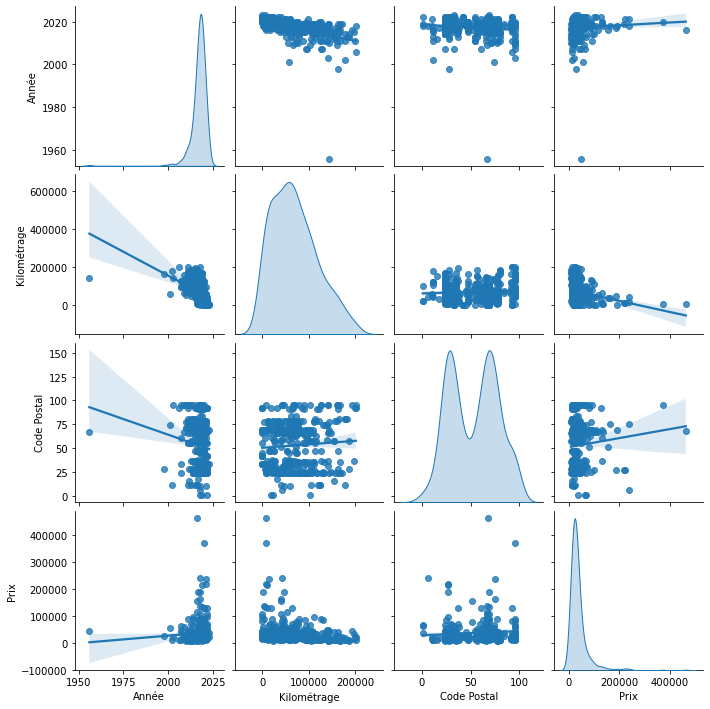

In [19]:
sns.pairplot(df, kind='reg', diag_kind='kde');